# Systems Identification using Synchronized Swept Sine

In [1]:
import matplotlib.pylab as plt
import numpy as np
import scipy
import soundfile as sf

### Synchronized Swept Sine Definition

In [2]:
f1 = 20        # start frequency
f2 = 20000       # end frequency
fs = 48000      # sampling frequency
T = 6          # time duration of the sweep
fade = [48000, 480]   # samlpes to fade-in and fade-out the input signal

In [3]:
# -- generation of the signal
L = T/np.log(f2/f1)                    # parametre of exp.swept-sine

t = np.linspace(0,T,fs*T)  # time axis
s = np.sin(2*np.pi*f1*L*np.exp(t/L))       # generated swept-sine signal

In [4]:
# fade-in the input signal
if fade[0]>0:
    s[0:fade[0]] = s[0:fade[0]] * ((-np.cos(np.arange(fade[0])/fade[0]*np.pi)+1) / 2)

# fade-out the input signal
if fade[1]>0:
    s[-fade[1]:] = s[-fade[1]:] *  ((np.cos(np.arange(fade[1])/fade[1]*np.pi)+1) / 2)
    

In [5]:
len(s)

288000

In [6]:
# Add 6 seconds of tail to the signal
s = np.hstack((s, np.zeros(6*fs)))
s *= 10**(-12/20) # leave 12dB of headroom for avoid damaging speakers

In [7]:
st = np.vstack((np.concatenate((s, np.zeros_like(s))), np.concatenate((np.zeros_like(s), s)))).T

In [8]:
sf.write('sweep.wav', st, fs)

### Fake Sweep

In [9]:
y = 0.8*s + np.roll(s, 4800)
#y = s

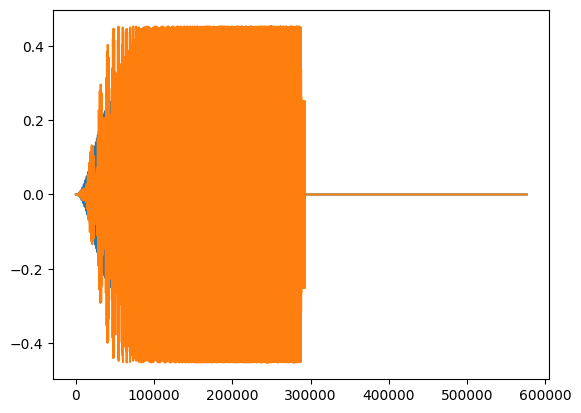

In [10]:
plt.plot(s)
plt.plot(y)

### Nonlinear deconvolution

In [11]:
s.shape

(576000,)

In [12]:
s_inv = np.flip(s, 0)

In [13]:
h = scipy.signal.convolve(s, s_inv, 'full')#[6*2*fs]

In [16]:
np.argmax(h) # -> roughly the reverb tail 

575999

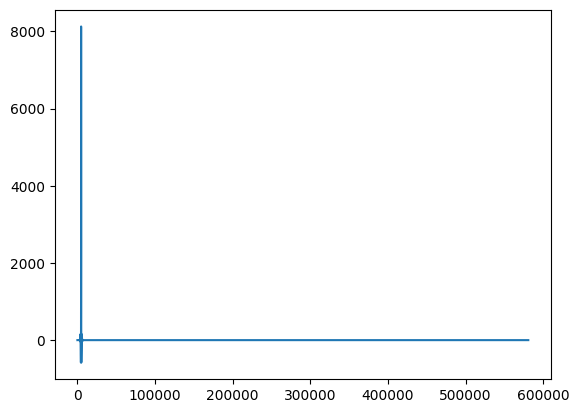

In [41]:
plt.plot(h[12 * fs - fs//10 :]) # we leave 100ms before the impulse for the pre-ringing